In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
df = pd.read_excel('Admission.xlsx')
df

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.00,58.80,Marketing & HR,50,65,74,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.50,66.28,Marketing & Finance,69,70,75,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NaN,0.00,52.91,Marketing & Finance,50,61,59,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.00,57.80,Marketing & Finance,54,66,62,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.00,59.43,Marketing & HR,52,65,67,Placed,180000
5,6,M,55.00,ICSE,64.00,CBSE,Commerce,50.00,Commerce,0,NaN,0.00,56.81,Marketing & Finance,53,70,53,Placed,300000
6,7,F,70.00,Others,54.00,Others,Science,65.00,Others,2,NaN,0.00,59.80,Marketing & HR,63,56,50,Placed,260000
7,8,M,68.00,ICSE,77.00,ISC,Commerce,72.50,Management,0,MAT,43.12,57.23,Marketing & Finance,74,72,50,Placed,235000
8,9,M,82.80,CBSE,70.60,CBSE,Commerce,69.30,Commerce,0,MAT,96.80,55.50,Marketing & Finance,65,76,70,Placed,425000
9,10,F,59.00,CBSE,74.00,CBSE,Arts,59.00,Management,1,NaN,0.00,63.83,Marketing & HR,50,59,77,Placed,240000


In [3]:
df.isnull().sum()

SlNo                    0
Gender                  0
Percent_SSC             0
Board_SSC               0
Percent_HSC             0
Board_HSC               0
Stream_HSC              0
Percent_Degree          0
Course_Degree           0
Experience_Yrs          0
Entrance_Test          67
Percentile_ET           0
Percent_MBA             0
Specialization_MBA      0
Marks_Communication     0
Marks_Projectwork       0
Marks_BOCA              0
Placement               0
Salary                  0
dtype: int64

In [6]:
df['Entrance_Test'].fillna(value='None',inplace=True)

In [7]:
df

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.00,58.80,Marketing & HR,50,65,74,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.50,66.28,Marketing & Finance,69,70,75,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,None,0.00,52.91,Marketing & Finance,50,61,59,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.00,57.80,Marketing & Finance,54,66,62,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.00,59.43,Marketing & HR,52,65,67,Placed,180000
5,6,M,55.00,ICSE,64.00,CBSE,Commerce,50.00,Commerce,0,None,0.00,56.81,Marketing & Finance,53,70,53,Placed,300000
6,7,F,70.00,Others,54.00,Others,Science,65.00,Others,2,None,0.00,59.80,Marketing & HR,63,56,50,Placed,260000
7,8,M,68.00,ICSE,77.00,ISC,Commerce,72.50,Management,0,MAT,43.12,57.23,Marketing & Finance,74,72,50,Placed,235000
8,9,M,82.80,CBSE,70.60,CBSE,Commerce,69.30,Commerce,0,MAT,96.80,55.50,Marketing & Finance,65,76,70,Placed,425000
9,10,F,59.00,CBSE,74.00,CBSE,Arts,59.00,Management,1,None,0.00,63.83,Marketing & HR,50,59,77,Placed,240000


In [8]:
df.isnull().sum()

SlNo                   0
Gender                 0
Percent_SSC            0
Board_SSC              0
Percent_HSC            0
Board_HSC              0
Stream_HSC             0
Percent_Degree         0
Course_Degree          0
Experience_Yrs         0
Entrance_Test          0
Percentile_ET          0
Percent_MBA            0
Specialization_MBA     0
Marks_Communication    0
Marks_Projectwork      0
Marks_BOCA             0
Placement              0
Salary                 0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 19 columns):
SlNo                   391 non-null int64
Gender                 391 non-null object
Percent_SSC            391 non-null float64
Board_SSC              391 non-null object
Percent_HSC            391 non-null float64
Board_HSC              391 non-null object
Stream_HSC             391 non-null object
Percent_Degree         391 non-null float64
Course_Degree          391 non-null object
Experience_Yrs         391 non-null int64
Entrance_Test          391 non-null object
Percentile_ET          391 non-null float64
Percent_MBA            391 non-null float64
Specialization_MBA     391 non-null object
Marks_Communication    391 non-null int64
Marks_Projectwork      391 non-null int64
Marks_BOCA             391 non-null int64
Placement              391 non-null object
Salary                 391 non-null int64
dtypes: float64(5), int64(6), object(8)
memory usage: 58.1+ KB


In [10]:
df1 = pd.DataFrame()

In [79]:
df5 = pd.get_dummies(data=df,columns=['Gender','Board_SSC','Board_HSC','Stream_HSC','Entrance_Test','Specialization_MBA','Course_Degree','Placement'])

In [36]:
df5

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary,Gender_F,Gender_M,Board_SSC_CBSE,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_CBSE,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Arts,Stream_HSC_Commerce,Stream_HSC_Science,Entrance_Test_CAT,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_None,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & Finance,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Course_Degree_Arts,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Placement_Not Placed,Placement_Placed
0,1,62.00,88.00,52.00,0,55.00,58.80,50,65,74,270000,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,2,76.33,75.33,75.48,1,86.50,66.28,69,70,75,200000,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,3,72.00,78.00,66.63,0,0.00,52.91,50,61,59,240000,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,4,60.00,63.00,58.00,0,75.00,57.80,54,66,62,250000,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,5,61.00,55.00,54.00,1,66.00,59.43,52,65,67,180000,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
5,6,55.00,64.00,50.00,0,0.00,56.81,53,70,53,300000,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
6,7,70.00,54.00,65.00,2,0.00,59.80,63,56,50,260000,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
7,8,68.00,77.00,72.50,0,43.12,57.23,74,72,50,235000,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
8,9,82.80,70.60,69.30,0,96.80,55.50,65,76,70,425000,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
9,10,59.00,74.00,59.00,1,0.00,63.83,50,59,77,240000,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 36 columns):
SlNo                                      391 non-null int64
Percent_SSC                               391 non-null float64
Percent_HSC                               391 non-null float64
Percent_Degree                            391 non-null float64
Course_Degree                             391 non-null object
Experience_Yrs                            391 non-null int64
Percentile_ET                             391 non-null float64
Percent_MBA                               391 non-null float64
Marks_Communication                       391 non-null int64
Marks_Projectwork                         391 non-null int64
Marks_BOCA                                391 non-null int64
Placement                                 391 non-null object
Salary                                    391 non-null int64
Gender_F                                  391 non-null uint8
Gender_M                     

In [18]:
df2 = pd.get_dummies(df['Course_Degree'])

In [23]:
df2

,Arts,Commerce,Computer Applications,Engineering,Management,Others,Science
0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0
5,0,1,0,0,0,0,0
6,0,0,0,0,0,1,0
7,0,0,0,0,1,0,0
8,0,1,0,0,0,0,0
9,0,0,0,0,1,0,0


In [26]:
df1

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,...,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_None,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & Finance,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB
0,1,62.00,88.00,52.00,Science,0,55.00,58.80,50,65,...,0,0,0,1,0,0,0,0,1,0
1,2,76.33,75.33,75.48,Computer Applications,1,86.50,66.28,69,70,...,0,0,0,1,0,0,0,1,0,0
2,3,72.00,78.00,66.63,Engineering,0,0.00,52.91,50,61,...,0,0,0,0,1,0,0,1,0,0
3,4,60.00,63.00,58.00,Management,0,75.00,57.80,54,66,...,0,0,0,1,0,0,0,1,0,0
4,5,61.00,55.00,54.00,Engineering,1,66.00,59.43,52,65,...,0,0,0,1,0,0,0,0,1,0
5,6,55.00,64.00,50.00,Commerce,0,0.00,56.81,53,70,...,0,0,0,0,1,0,0,1,0,0
6,7,70.00,54.00,65.00,Others,2,0.00,59.80,63,56,...,0,0,0,0,1,0,0,0,1,0
7,8,68.00,77.00,72.50,Management,0,43.12,57.23,74,72,...,0,0,0,1,0,0,0,1,0,0
8,9,82.80,70.60,69.30,Commerce,0,96.80,55.50,65,76,...,0,0,0,1,0,0,0,1,0,0
9,10,59.00,74.00,59.00,Management,1,0.00,63.83,50,59,...,0,0,0,0,1,0,0,0,1,0


In [30]:
df4.shape

(391, 42)

In [31]:
pd.set_option('Display.max_columns',None)

In [37]:
df5.drop(columns=['SlNo'],inplace=True)

In [38]:
df5

,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary,Gender_F,Gender_M,Board_SSC_CBSE,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_CBSE,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Arts,Stream_HSC_Commerce,Stream_HSC_Science,Entrance_Test_CAT,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_None,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & Finance,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Course_Degree_Arts,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Placement_Not Placed,Placement_Placed
0,62.00,88.00,52.00,0,55.00,58.80,50,65,74,270000,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,76.33,75.33,75.48,1,86.50,66.28,69,70,75,200000,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,72.00,78.00,66.63,0,0.00,52.91,50,61,59,240000,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,60.00,63.00,58.00,0,75.00,57.80,54,66,62,250000,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,61.00,55.00,54.00,1,66.00,59.43,52,65,67,180000,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
5,55.00,64.00,50.00,0,0.00,56.81,53,70,53,300000,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
6,70.00,54.00,65.00,2,0.00,59.80,63,56,50,260000,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
7,68.00,77.00,72.50,0,43.12,57.23,74,72,50,235000,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
8,82.80,70.60,69.30,0,96.80,55.50,65,76,70,425000,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
9,59.00,74.00,59.00,1,0.00,63.83,50,59,77,240000,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [39]:
df5

,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary,Gender_F,Gender_M,Board_SSC_CBSE,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_CBSE,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Arts,Stream_HSC_Commerce,Stream_HSC_Science,Entrance_Test_CAT,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_None,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & Finance,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Course_Degree_Arts,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Placement_Not Placed,Placement_Placed
0,62.00,88.00,52.00,0,55.00,58.80,50,65,74,270000,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,76.33,75.33,75.48,1,86.50,66.28,69,70,75,200000,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,72.00,78.00,66.63,0,0.00,52.91,50,61,59,240000,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,60.00,63.00,58.00,0,75.00,57.80,54,66,62,250000,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,61.00,55.00,54.00,1,66.00,59.43,52,65,67,180000,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
5,55.00,64.00,50.00,0,0.00,56.81,53,70,53,300000,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
6,70.00,54.00,65.00,2,0.00,59.80,63,56,50,260000,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
7,68.00,77.00,72.50,0,43.12,57.23,74,72,50,235000,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
8,82.80,70.60,69.30,0,96.80,55.50,65,76,70,425000,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
9,59.00,74.00,59.00,1,0.00,63.83,50,59,77,240000,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [40]:
df5.shape

(391, 42)

In [43]:
X = df5.drop(columns='Salary')
y = df5['Salary']

In [44]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)  # To learn b0 . linear regressin model will learn bo by defalut but we have to pass as parameter in ols
model = sm.OLS(y,X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     26.37
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           2.89e-76
Time:                        13:59:41   Log-Likelihood:                -4941.3
No. Observations:                 391   AIC:                             9951.
Df Residuals:                     357   BIC:                         1.009e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -1.947e+04   1.65e+04     -1.179      0.239   -5.19e+04     1.3e+04
Percent_SSC                             -175.1697    508.303     -0.345      0.731   -1174.814     824.475
Percent_HSC                              -58.7706    472.555     -0.124      0.901    -988.112     870.571
Percent_Degree                           431.2978    575.480      0.749      0.454    -700.459    1563.055
Experience_Yrs                          1.541e+04   6457.561      2.387      0.018    2712.681    2.81e+04
Percentile_ET                            271.1084    272.931      0.993      0.321    -265.647     807.864
Percent_MBA                              904.0405   1198.801      0.754      0.451   -1453.560    3261.641
Marks_Communication                     1347.5144    693.766      1.942      0.053     -16.868    2711.897
Marks_Projectwork                        -28.8955    653.848     -0.044      0.965   -1314.773    1256.982
Marks_BOCA                               620.5436    513.235      1.209      0.227    -388.800    1629.887
Gender_F                               -2.691e+04    1.1e+04     -2.457      0.014   -4.84e+04   -5370.002
Gender_M                                7437.6444   7813.177      0.952      0.342   -7927.993    2.28e+04
Board_SSC_CBSE                          5251.6959   1.02e+04      0.514      0.608   -1.48e+04    2.53e+04
Board_SSC_ICSE                         -1.569e+04   1.07e+04     -1.467      0.143   -3.67e+04    5349.819
Board_SSC_Others                       -9032.9836   8899.902     -1.015      0.311   -2.65e+04    8469.841
Board_HSC_CBSE                         -1.291e+04   1.09e+04     -1.182      0.238   -3.44e+04    8562.284
Board_HSC_ISC                           2162.0582   1.17e+04      0.185      0.854   -2.09e+04    2.52e+04
Board_HSC_Others                       -8719.8423   9514.449     -0.916      0.360   -2.74e+04    9991.570
Stream_HSC_Arts                        -2.719e+04   1.63e+04     -1.673      0.095   -5.91e+04    4773.208
Stream_HSC_Commerce                     7339.1523    1.1e+04      0.670      0.503   -1.42e+04    2.89e+04
Stream_HSC_Science                       377.1550   1.18e+04      0.032      0.975   -2.29e+04    2.37e+04
Entrance_Test_CAT                       1.277e+04   2.32e+04      0.550      0.583   -3.29e+04    5.84e+04
Entrance_Test_G-MAT                     1.529e+04   7.27e+04      0.210      0.834   -1.28e+05    1.58e+05
Entrance_Test_G-SAT                    -2.724e+04   7.38e+04     -0.369      0.712   -1.72e+05    1.18e+05
Entrance_Test_GCET                     -2.608e+04   5.36e+04     -0.486      0.627   -1.32e+05    7.94e+04
Entrance_Test_K-MAT                     2.804e+04   2.48e+04      1.131      0.259   -2

In [45]:
predictedvalues = model.predict()
resids = model.resid

In [46]:
from scipy import stats
print(stats.jarque_bera(model.resid))

(3904.794750269242, 0.0)


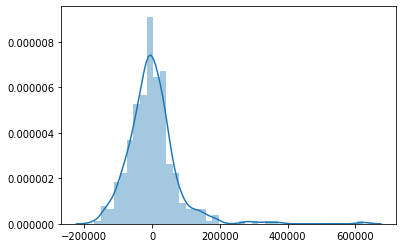

In [47]:
sns.distplot(resids)

In [48]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=model, frac=0.5)

(0.6657604285715177, 0.9967569914880168)

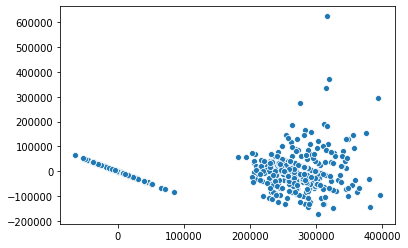

In [49]:
sns.scatterplot(predictedvalues,resids)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Gender_F,Gender_M,Board_SSC_CBSE,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_CBSE,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Arts,Stream_HSC_Commerce,Stream_HSC_Science,Entrance_Test_CAT,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_None,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & Finance,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Course_Degree_Arts,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Placement_Not Placed,Placement_Placed
vif,1.991338,1.867708,1.689119,1.190638,4.642769,3.160122,2.404419,1.400277,1.551905,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


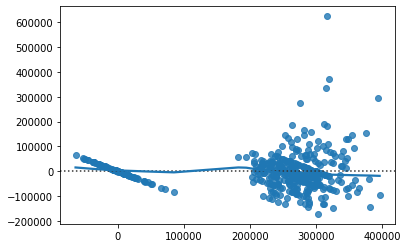

In [53]:
sns.residplot(predictedvalues,resids,lowess=True)

In [63]:
num = ['Percent_SSC','Percent_HSC','Percent_Degree','Percentile_ET','Percent_MBA','Marks_Communication','Marks_Projectwork','Marks_BOCA','salary']
sdd = pd.DataFrame()
for i in num:
    sdd[i] = np.log(df5[i])
sdd

,Percent_SSC,Percent_HSC,Percent_Degree,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA
0,4.127134,4.477337,3.951244,4.007333,4.074142,3.912023,4.174387,4.304065
1,4.335066,4.321878,4.323868,4.460144,4.193888,4.234107,4.248495,4.317488
2,4.276666,4.356709,4.199155,-inf,3.968592,3.912023,4.110874,4.077537
3,4.094345,4.143135,4.060443,4.317488,4.056989,3.988984,4.189655,4.127134
4,4.110874,4.007333,3.988984,4.189655,4.084799,3.951244,4.174387,4.204693
5,4.007333,4.158883,3.912023,-inf,4.039712,3.970292,4.248495,3.970292
6,4.248495,3.988984,4.174387,-inf,4.091006,4.143135,4.025352,3.912023
7,4.219508,4.343805,4.283587,3.763987,4.047078,4.304065,4.276666,3.912023
8,4.416428,4.257030,4.238445,4.572647,4.016383,4.174387,4.330733,4.248495
9,4.077537,4.304065,4.077537,-inf,4.156223,3.912023,4.077537,4.343805


In [62]:
df5

,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary,Gender_F,Gender_M,Board_SSC_CBSE,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_CBSE,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Arts,Stream_HSC_Commerce,Stream_HSC_Science,Entrance_Test_CAT,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_None,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & Finance,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Course_Degree_Arts,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Placement_Not Placed,Placement_Placed
0,62.00,88.00,52.00,0,55.00,58.80,50,65,74,270000,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,76.33,75.33,75.48,1,86.50,66.28,69,70,75,200000,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,72.00,78.00,66.63,0,0.00,52.91,50,61,59,240000,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,60.00,63.00,58.00,0,75.00,57.80,54,66,62,250000,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,61.00,55.00,54.00,1,66.00,59.43,52,65,67,180000,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
5,55.00,64.00,50.00,0,0.00,56.81,53,70,53,300000,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
6,70.00,54.00,65.00,2,0.00,59.80,63,56,50,260000,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
7,68.00,77.00,72.50,0,43.12,57.23,74,72,50,235000,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
8,82.80,70.60,69.30,0,96.80,55.50,65,76,70,425000,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
9,59.00,74.00,59.00,1,0.00,63.83,50,59,77,240000,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [76]:
sdd['Percentile_ET'].replace('-inf',0,inplace=True)

In [75]:
sdd

,Percent_SSC,Percent_HSC,Percent_Degree,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA
0,4.127134,4.477337,3.951244,4.007333,4.074142,3.912023,4.174387,4.304065
1,4.335066,4.321878,4.323868,4.460144,4.193888,4.234107,4.248495,4.317488
2,4.276666,4.356709,4.199155,-inf,3.968592,3.912023,4.110874,4.077537
3,4.094345,4.143135,4.060443,4.317488,4.056989,3.988984,4.189655,4.127134
4,4.110874,4.007333,3.988984,4.189655,4.084799,3.951244,4.174387,4.204693
5,4.007333,4.158883,3.912023,-inf,4.039712,3.970292,4.248495,3.970292
6,4.248495,3.988984,4.174387,-inf,4.091006,4.143135,4.025352,3.912023
7,4.219508,4.343805,4.283587,3.763987,4.047078,4.304065,4.276666,3.912023
8,4.416428,4.257030,4.238445,4.572647,4.016383,4.174387,4.330733,4.248495
9,4.077537,4.304065,4.077537,-inf,4.156223,3.912023,4.077537,4.343805


In [69]:
sdd['Percentile_ET'][2]

-inf

In [77]:
df5

,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary,Gender_F,Gender_M,Board_SSC_CBSE,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_CBSE,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Arts,Stream_HSC_Commerce,Stream_HSC_Science,Entrance_Test_CAT,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_None,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & Finance,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Course_Degree_Arts,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Placement_Not Placed,Placement_Placed
0,62.00,88.00,52.00,0,55.00,58.80,50,65,74,270000,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,76.33,75.33,75.48,1,86.50,66.28,69,70,75,200000,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,72.00,78.00,66.63,0,0.00,52.91,50,61,59,240000,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,60.00,63.00,58.00,0,75.00,57.80,54,66,62,250000,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,61.00,55.00,54.00,1,66.00,59.43,52,65,67,180000,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
5,55.00,64.00,50.00,0,0.00,56.81,53,70,53,300000,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
6,70.00,54.00,65.00,2,0.00,59.80,63,56,50,260000,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
7,68.00,77.00,72.50,0,43.12,57.23,74,72,50,235000,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
8,82.80,70.60,69.30,0,96.80,55.50,65,76,70,425000,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
9,59.00,74.00,59.00,1,0.00,63.83,50,59,77,240000,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [80]:
num=['Percent_SSC','Percent_HSC','Percent_Degree','Percent_MBA','Marks_Communication','Marks_Projectwork','Marks_BOCA']
for i in num:
    df5[i] = np.log(df5[i])
df5

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary,Gender_F,Gender_M,Board_SSC_CBSE,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_CBSE,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Arts,Stream_HSC_Commerce,Stream_HSC_Science,Entrance_Test_CAT,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_None,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & Finance,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Course_Degree_Arts,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Placement_Not Placed,Placement_Placed
0,1,4.127134,4.477337,3.951244,0,55.00,4.074142,3.912023,4.174387,4.304065,270000,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,2,4.335066,4.321878,4.323868,1,86.50,4.193888,4.234107,4.248495,4.317488,200000,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,3,4.276666,4.356709,4.199155,0,0.00,3.968592,3.912023,4.110874,4.077537,240000,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,4,4.094345,4.143135,4.060443,0,75.00,4.056989,3.988984,4.189655,4.127134,250000,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,5,4.110874,4.007333,3.988984,1,66.00,4.084799,3.951244,4.174387,4.204693,180000,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
5,6,4.007333,4.158883,3.912023,0,0.00,4.039712,3.970292,4.248495,3.970292,300000,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
6,7,4.248495,3.988984,4.174387,2,0.00,4.091006,4.143135,4.025352,3.912023,260000,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
7,8,4.219508,4.343805,4.283587,0,43.12,4.047078,4.304065,4.276666,3.912023,235000,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
8,9,4.416428,4.257030,4.238445,0,96.80,4.016383,4.174387,4.330733,4.248495,425000,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
9,10,4.077537,4.304065,4.077537,1,0.00,4.156223,3.912023,4.077537,4.343805,240000,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [86]:
li=[]
for i in df['Salary']:
    if(i!=0):
        li.append(np.log(i))
    else:
        li.append(0)
df5['Salary']=li
        

In [84]:
df5

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary,Gender_F,Gender_M,Board_SSC_CBSE,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_CBSE,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Arts,Stream_HSC_Commerce,Stream_HSC_Science,Entrance_Test_CAT,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_None,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & Finance,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Course_Degree_Arts,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Placement_Not Placed,Placement_Placed
0,1,4.127134,4.477337,3.951244,0,4.007333,4.074142,3.912023,4.174387,4.304065,270000,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,2,4.335066,4.321878,4.323868,1,4.460144,4.193888,4.234107,4.248495,4.317488,200000,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,3,4.276666,4.356709,4.199155,0,0.000000,3.968592,3.912023,4.110874,4.077537,240000,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,4,4.094345,4.143135,4.060443,0,4.317488,4.056989,3.988984,4.189655,4.127134,250000,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,5,4.110874,4.007333,3.988984,1,4.189655,4.084799,3.951244,4.174387,4.204693,180000,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
5,6,4.007333,4.158883,3.912023,0,0.000000,4.039712,3.970292,4.248495,3.970292,300000,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
6,7,4.248495,3.988984,4.174387,2,0.000000,4.091006,4.143135,4.025352,3.912023,260000,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
7,8,4.219508,4.343805,4.283587,0,3.763987,4.047078,4.304065,4.276666,3.912023,235000,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
8,9,4.416428,4.257030,4.238445,0,4.572647,4.016383,4.174387,4.330733,4.248495,425000,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
9,10,4.077537,4.304065,4.077537,1,0.000000,4.156223,3.912023,4.077537,4.343805,240000,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [85]:
for i in df['Salary']:
    if(i!=0):
        li.append(np.log(i))
    else:
        li.append(0)
df5['Salary']=li

ValueError: Length of values does not match length of index

In [87]:
df5

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary,Gender_F,Gender_M,Board_SSC_CBSE,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_CBSE,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Arts,Stream_HSC_Commerce,Stream_HSC_Science,Entrance_Test_CAT,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_None,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & Finance,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Course_Degree_Arts,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Placement_Not Placed,Placement_Placed
0,1,4.127134,4.477337,3.951244,0,4.007333,4.074142,3.912023,4.174387,4.304065,12.506177,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,2,4.335066,4.321878,4.323868,1,4.460144,4.193888,4.234107,4.248495,4.317488,12.206073,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,3,4.276666,4.356709,4.199155,0,0.000000,3.968592,3.912023,4.110874,4.077537,12.388394,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,4,4.094345,4.143135,4.060443,0,4.317488,4.056989,3.988984,4.189655,4.127134,12.429216,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,5,4.110874,4.007333,3.988984,1,4.189655,4.084799,3.951244,4.174387,4.204693,12.100712,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
5,6,4.007333,4.158883,3.912023,0,0.000000,4.039712,3.970292,4.248495,3.970292,12.611538,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
6,7,4.248495,3.988984,4.174387,2,0.000000,4.091006,4.143135,4.025352,3.912023,12.468437,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
7,8,4.219508,4.343805,4.283587,0,3.763987,4.047078,4.304065,4.276666,3.912023,12.367341,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
8,9,4.416428,4.257030,4.238445,0,4.572647,4.016383,4.174387,4.330733,4.248495,12.959844,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
9,10,4.077537,4.304065,4.077537,1,0.000000,4.156223,3.912023,4.077537,4.343805,12.388394,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [88]:
df5

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary,Gender_F,Gender_M,Board_SSC_CBSE,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_CBSE,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Arts,Stream_HSC_Commerce,Stream_HSC_Science,Entrance_Test_CAT,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_None,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & Finance,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Course_Degree_Arts,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Placement_Not Placed,Placement_Placed
0,1,4.127134,4.477337,3.951244,0,4.007333,4.074142,3.912023,4.174387,4.304065,12.506177,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,2,4.335066,4.321878,4.323868,1,4.460144,4.193888,4.234107,4.248495,4.317488,12.206073,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,3,4.276666,4.356709,4.199155,0,0.000000,3.968592,3.912023,4.110874,4.077537,12.388394,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,4,4.094345,4.143135,4.060443,0,4.317488,4.056989,3.988984,4.189655,4.127134,12.429216,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,5,4.110874,4.007333,3.988984,1,4.189655,4.084799,3.951244,4.174387,4.204693,12.100712,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
5,6,4.007333,4.158883,3.912023,0,0.000000,4.039712,3.970292,4.248495,3.970292,12.611538,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
6,7,4.248495,3.988984,4.174387,2,0.000000,4.091006,4.143135,4.025352,3.912023,12.468437,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
7,8,4.219508,4.343805,4.283587,0,3.763987,4.047078,4.304065,4.276666,3.912023,12.367341,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
8,9,4.416428,4.257030,4.238445,0,4.572647,4.016383,4.174387,4.330733,4.248495,12.959844,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
9,10,4.077537,4.304065,4.077537,1,0.000000,4.156223,3.912023,4.077537,4.343805,12.388394,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [89]:
X = df5.drop(columns='Salary')
y = df5['Salary']

In [90]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)  # To learn b0 . linear regressin model will learn bo by defalut but we have to pass as parameter in ols
model = sm.OLS(y,X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4605.
Date:                Mon, 03 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:49:50   Log-Likelihood:                 4.9337
No. Observations:                 391   AIC:                             60.13
Df Residuals:                     356   BIC:                             199.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.8905      0.209      4.259      0.000       0.479       1.302
SlNo                                       0.0001      0.000      1.166      0.244   -9.67e-05       0.000
Percent_SSC                                0.0645      0.101      0.641      0.522      -0.133       0.262
Percent_HSC                               -0.0018      0.097     -0.018      0.986      -0.193       0.189
Percent_Degree                             0.0882      0.113      0.782      0.435      -0.134       0.310
Experience_Yrs                             0.0391      0.021      1.890      0.060      -0.002       0.080
Percentile_ET                              0.0310      0.032      0.983      0.326      -0.031       0.093
Percent_MBA                                0.2553      0.237      1.078      0.282      -0.210       0.721
Marks_Communication                        0.2158      0.139      1.558      0.120      -0.057       0.488
Marks_Projectwork                         -0.0010      0.140     -0.007      0.994      -0.276       0.274
Marks_BOCA                                 0.0925      0.106      0.876      0.382      -0.115       0.300
Gender_F                                   0.3873      0.111      3.485      0.001       0.169       0.606
Gender_M                                   0.5032      0.100      5.041      0.000       0.307       0.699
Board_SSC_CBSE                             0.3397      0.074      4.572      0.000       0.194       0.486
Board_SSC_ICSE                             0.2545      0.077      3.297      0.001       0.103       0.406
Board_SSC_Others                           0.2963      0.072      4.088      0.000       0.154       0.439
Board_HSC_CBSE                             0.2661      0.076      3.482      0.001       0.116       0.416
Board_HSC_ISC                              0.3375      0.076      4.441      0.000       0.188       0.487
Board_HSC_Others                           0.2869      0.075      3.828      0.000       0.139       0.434
Stream_HSC_Arts                            0.2374      0.083      2.844      0.005       0.073       0.402
Stream_HSC_Commerce                        0.3352      0.077      4.354      0.000       0.184       0.487
Stream_HSC_Science                         0.3179      0.078      4.058      0.000       0.164       0.472
Entrance_Test_CAT                          0.1069      0.091      1.178      0.239      -0.072       0.285
Entrance_Test_G-MAT                        0.2474      0.245      1.010      0.313      -0.234       0.729
Entrance_Test_G-SAT                        0.0337      0.247      0.136      0.892      -0.453       0.520
Entrance_Test_GCET                         0.0077      0.180      0.043      0.966     

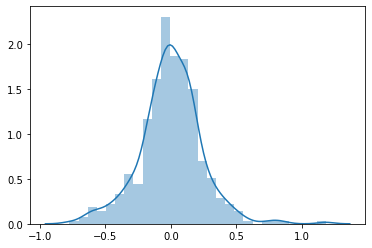

In [91]:
sns.distplot(model.resid)

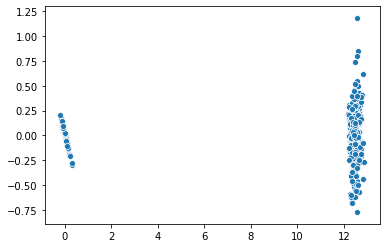

In [93]:
sns.scatterplot(model.predict(),model.resid)

In [95]:
df5.drop(columns=['SlNo'],inplace=True)

In [96]:
df5.shape

(391, 42)

In [97]:
df5

,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary,Gender_F,Gender_M,Board_SSC_CBSE,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_CBSE,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Arts,Stream_HSC_Commerce,Stream_HSC_Science,Entrance_Test_CAT,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_None,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & Finance,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Course_Degree_Arts,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Placement_Not Placed,Placement_Placed
0,4.127134,4.477337,3.951244,0,4.007333,4.074142,3.912023,4.174387,4.304065,12.506177,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,4.335066,4.321878,4.323868,1,4.460144,4.193888,4.234107,4.248495,4.317488,12.206073,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,4.276666,4.356709,4.199155,0,0.000000,3.968592,3.912023,4.110874,4.077537,12.388394,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,4.094345,4.143135,4.060443,0,4.317488,4.056989,3.988984,4.189655,4.127134,12.429216,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,4.110874,4.007333,3.988984,1,4.189655,4.084799,3.951244,4.174387,4.204693,12.100712,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
5,4.007333,4.158883,3.912023,0,0.000000,4.039712,3.970292,4.248495,3.970292,12.611538,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
6,4.248495,3.988984,4.174387,2,0.000000,4.091006,4.143135,4.025352,3.912023,12.468437,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
7,4.219508,4.343805,4.283587,0,3.763987,4.047078,4.304065,4.276666,3.912023,12.367341,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
8,4.416428,4.257030,4.238445,0,4.572647,4.016383,4.174387,4.330733,4.248495,12.959844,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
9,4.077537,4.304065,4.077537,1,0.000000,4.156223,3.912023,4.077537,4.343805,12.388394,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [98]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [103]:
lim = LinearRegression()
lim.fit(x_train,y_train)
print(lim.score(x_train,y_train))
print(lim.score(x_test,y_test))

0.9978027333497054
0.9973055648713713


In [106]:
# feature selection
#no of features
nof_list=np.arange(1,42)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    #X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    #model = LinearRegression()
    rfe = RFE(lim,nof_list[n])
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    lim.fit(x_train_rfe,y_train)
    score = lim.score(x_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.997523


In [107]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [108]:
cv_model.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [109]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00102529
Optimal l1_ratio: 1.000
Number of iterations 23


In [110]:
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(x_train, y_train)

ElasticNet(alpha=0.0010252888873277068, copy_X=True, fit_intercept=True,
           l1_ratio=1.0, max_iter=23, normalize=True, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [112]:
print(r2_score(y_train, model.predict(x_train))) # training data performance

0.9975784965468679


In [114]:
print(r2_score(y_test, model.predict(x_test))) # test data performance

0.9974956034935343
